<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Mod_3_Lab_2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 3: CLASSIFICATION-1**

## LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

### **Implemeting KNN**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

If k = 1 then the algorithm will simply return the label of the nearest neighbour.
If k > 1 the most common label out of the given labels in the k neighbours will be selected.

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

### **Defining function Accuracy:**

Accuracy in machine learning is a performance metric that measures the proportion of correctly classified instances among the total instances. It is calculated by dividing the number of correct predictions by the total number of predictions. Represented as a percentage, accuracy provides an overall assessment of a model's correctness in its predictions. However, it may not be suitable for imbalanced datasets where the class distribution is uneven.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

### **Section 1.1 - Iris Dataset**

### *Iris Dataset present in the scikit learn library*

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

### KNN algorithm for the Iris Dataset by creating our own classifier

In [8]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of own classifier is {} %".format(100*accuracy))

The accuracy of own classifier is 94.0 %


### KNN algorithm for the Iris Dataset by sklearn classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


### **Section 1.2: Weighted NN**

For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

---

### **TASK**

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(X_train, y_train, X_query, k):
    all_distances = []
    for x_query in X_query:
        distances = [euclidean_distance(x_query, x) for x in X_train]
        sorted_indices = np.argsort(distances)

        k_nearest_neighbors = [(X_train[i], y_train[i], distances[i]) for i in sorted_indices[:k]]
        all_distances.append(k_nearest_neighbors)

    return all_distances

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making predictions with k_nearest_neighbors function
k = 5
predictions = k_nearest_neighbors(X_train, y_train, X_test, k)

# Print the k-nearest neighbors and their distances for the first query point
print("For the first query point:")
for neighbor in predictions[0]:
    print(f"Neighbor: {neighbor[0]}, Label: {neighbor[1]}, Distance: {neighbor[2]}")

For the first query point:
Neighbor: [6.1 2.9 4.7 1.4], Label: 1, Distance: 0.22360679774997896
Neighbor: [6.1 3.  4.6 1.4], Label: 1, Distance: 0.30000000000000027
Neighbor: [6.2 2.9 4.3 1.3], Label: 1, Distance: 0.43588989435406783
Neighbor: [6.3 2.5 4.9 1.5], Label: 1, Distance: 0.5099019513592785
Neighbor: [6.5 2.8 4.6 1.5], Label: 1, Distance: 0.5099019513592788


## **Section 2: Visualizing Data**

### We will look into something called Voronoi diagrams.

Voronoi diagrams can be applied in various ways in machine learning, particularly in spatial analysis and clustering. Voronoi diagrams partition a space into regions based on the distance to a predefined set of points. Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [11]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

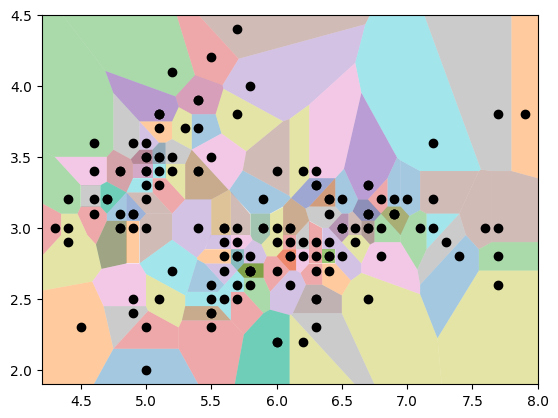

In [12]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

### Section 2.2: Understanding Decision Boundaries

### Decision Boundary
While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).

In [13]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()

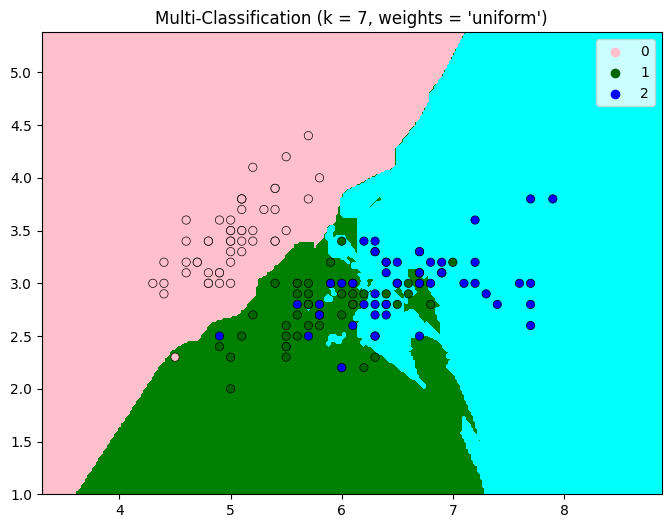

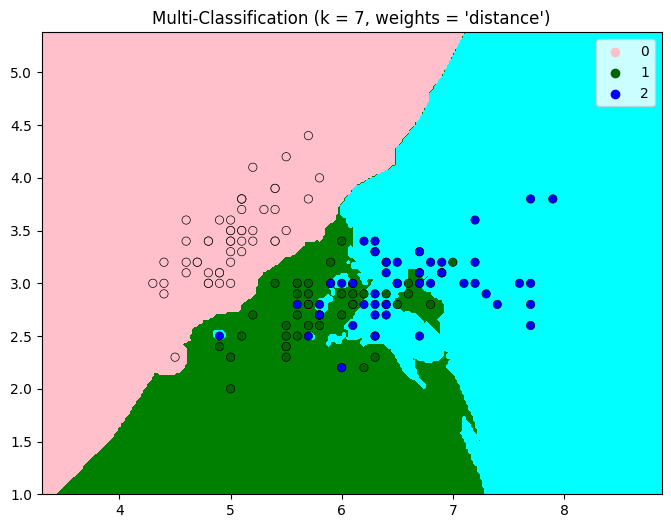

In [14]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

### **TASK-2**

<Figure size 1000x600 with 0 Axes>

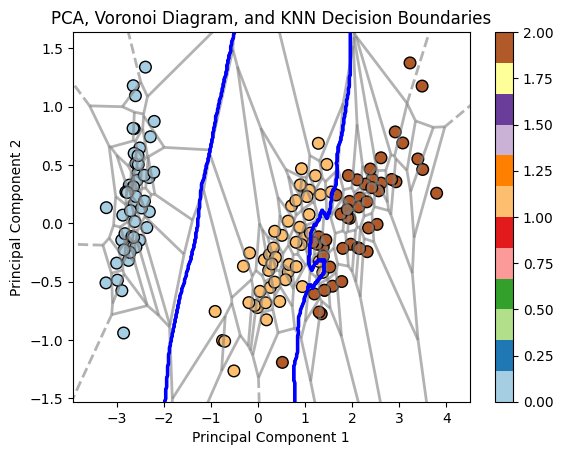

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the dataset to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit a KNN classifier on the reduced dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

# Plot Voronoi diagram
vor = Voronoi(X_pca)

# Plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot Voronoi diagram
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='grey', line_width=2, line_alpha=0.6, point_size=2)

# Plot decision boundaries
plt.contour(xx, yy, Z, colors='blue', linewidths=2)

# Scatter plot of the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired, s=70)
plt.colorbar(scatter)

plt.title('PCA, Voronoi Diagram, and KNN Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### **Section 2.3: Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix provides a summary of the model's predictions, breaking down the results into four categories: true positive (TP), true negative (TN), false positive (FP), and false negative (FN). These categories are defined as follows:

- **True Positive (TP):** Instances where the model correctly predicts the positive class.
- **True Negative (TN):** Instances where the model correctly predicts the negative class.
- **False Positive (FP):** Instances where the model incorrectly predicts the positive class (Type I error).
- **False Negative (FN):** Instances where the model incorrectly predicts the negative class (Type II error).

The confusion matrix is often presented in a tabular format like this:

\[
\begin{array}{cc|c|c}
 & \text{Predicted Positive} & \text{Predicted Negative} \\
\hline
\text{Actual Positive} & \text{TP} & \text{FP} \\
\text{Actual Negative} & \text{FN} & \text{TN} \\
\end{array}
\]

From the confusion matrix, various performance metrics can be derived, including:

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,10,0,0,10
1,0,9,0,9
2,0,0,11,11
All,10,9,11,30


Text(0.5, 23.52222222222222, 'Predicted label')

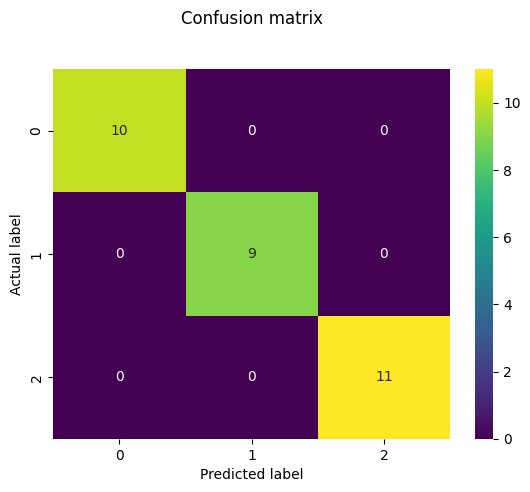

In [24]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Section 2.4: Classification Report**

1. Accuracy: Represents the overall correctness of the model. It's the ratio of correctly predicted instances to the total instances. However, accuracy may not be a suitable metric for imbalanced datasets.

2. Precision (Positive Predictive Value): Measures the accuracy of positive predictions. It's the ratio of true positives to the sum of true positives and false positives. Precision is important when the cost of false positives is high.

3. Recall (Sensitivity, True Positive Rate): Represents the fraction of actual positives that were correctly identified by the model. It's the ratio of true positives to the sum of true positives and false negatives. Recall is important when the cost of false negatives is high.

4. F1-Score: It's the harmonic mean of precision and recall. It provides a balance between precision and recall. F1-Score is particularly useful when there is an uneven class distribution.

In [25]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **Car Evaluation Dataset**

In [21]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [26]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [27]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [28]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


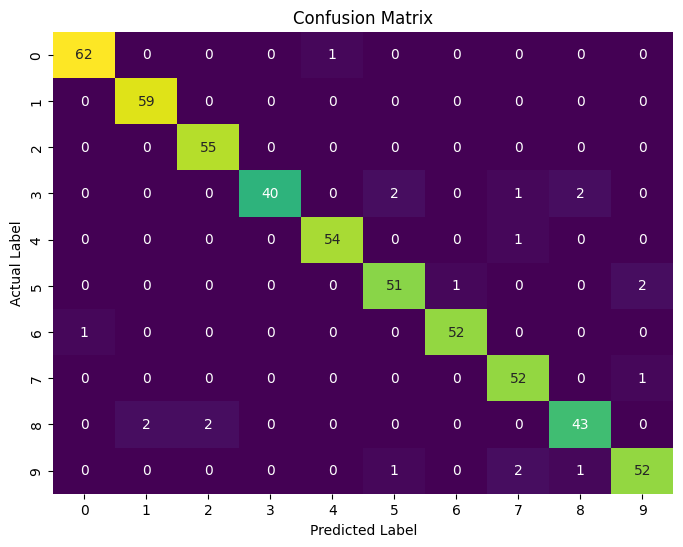

In [30]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can use any classifier you want
import pandas as pd

# Load your dataset or replace this with your data loading code
# For example, assuming your dataset is a CSV file:
df = pd.read_csv('/content/car_evaluation.csv')

# Here, I'll use a toy dataset for illustration
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Fit a classifier (replace with your own classifier)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="viridis", fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [31]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [33]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



In KNN (K-Nearest Neighbors) classification, the choice between 'uniform' and 'distance' for the `weights` parameter determines how the contributions of the neighbors are weighted when making predictions for a new data point:

1. **Uniform weighting ('uniform'):**
   - All neighbors have an equal vote in the decision-making process.
   - The predicted class for a new data point is determined by a simple majority vote of its k-nearest neighbors.

2. **Distance-weighted ('distance'):**
   - Closer neighbors have more influence on the prediction.
   - The contribution of each neighbor is inversely proportional to its distance from the query point. Closer neighbors have a stronger influence on the prediction.
   
### Drawbacks of KNN:

1. **Computational Complexity:**
   - KNN can be computationally expensive, especially as the size of the dataset grows. For each prediction, distances between the query point and all data points must be calculated.

2. **Sensitivity to Feature Scaling:**
   - KNN is sensitive to the scale of the features. Features with larger scales can dominate the distance computations, leading to biased results. It's often essential to normalize or standardize the features before applying KNN.

3. **Curse of Dimensionality:**
   - As the number of features increases, the volume of the feature space grows exponentially. This can lead to a situation where the nearest neighbors are not necessarily close in the high-dimensional space, impacting the effectiveness of KNN.

4. **Memory Usage:**
   - Storing the entire dataset in memory for fast lookup can be memory-intensive, especially for large datasets.

5. **Choosing an Optimal Value for K:**
   - Selecting an appropriate value for the parameter k (number of neighbors) is crucial. A too-small k may result in noisy predictions, while a too-large k might smooth out patterns in the data.

6. **Imbalanced Datasets:**
   - KNN can be sensitive to imbalances in class distribution. In situations where one class significantly outnumbers the others, the majority class may dominate predictions.

7. **No Model Representation:**
   - KNN is an instance-based learning algorithm and does not provide a clear model representation. This makes it challenging to interpret the relationships between features and the target variable.